In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_predict, cross_val_score
import seaborn as sb
import random
import statsmodels.api as sm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')



In [2]:
train_df = pd.read_csv("train.csv")
train_df.head()



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train_df.shape



(1460, 81)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

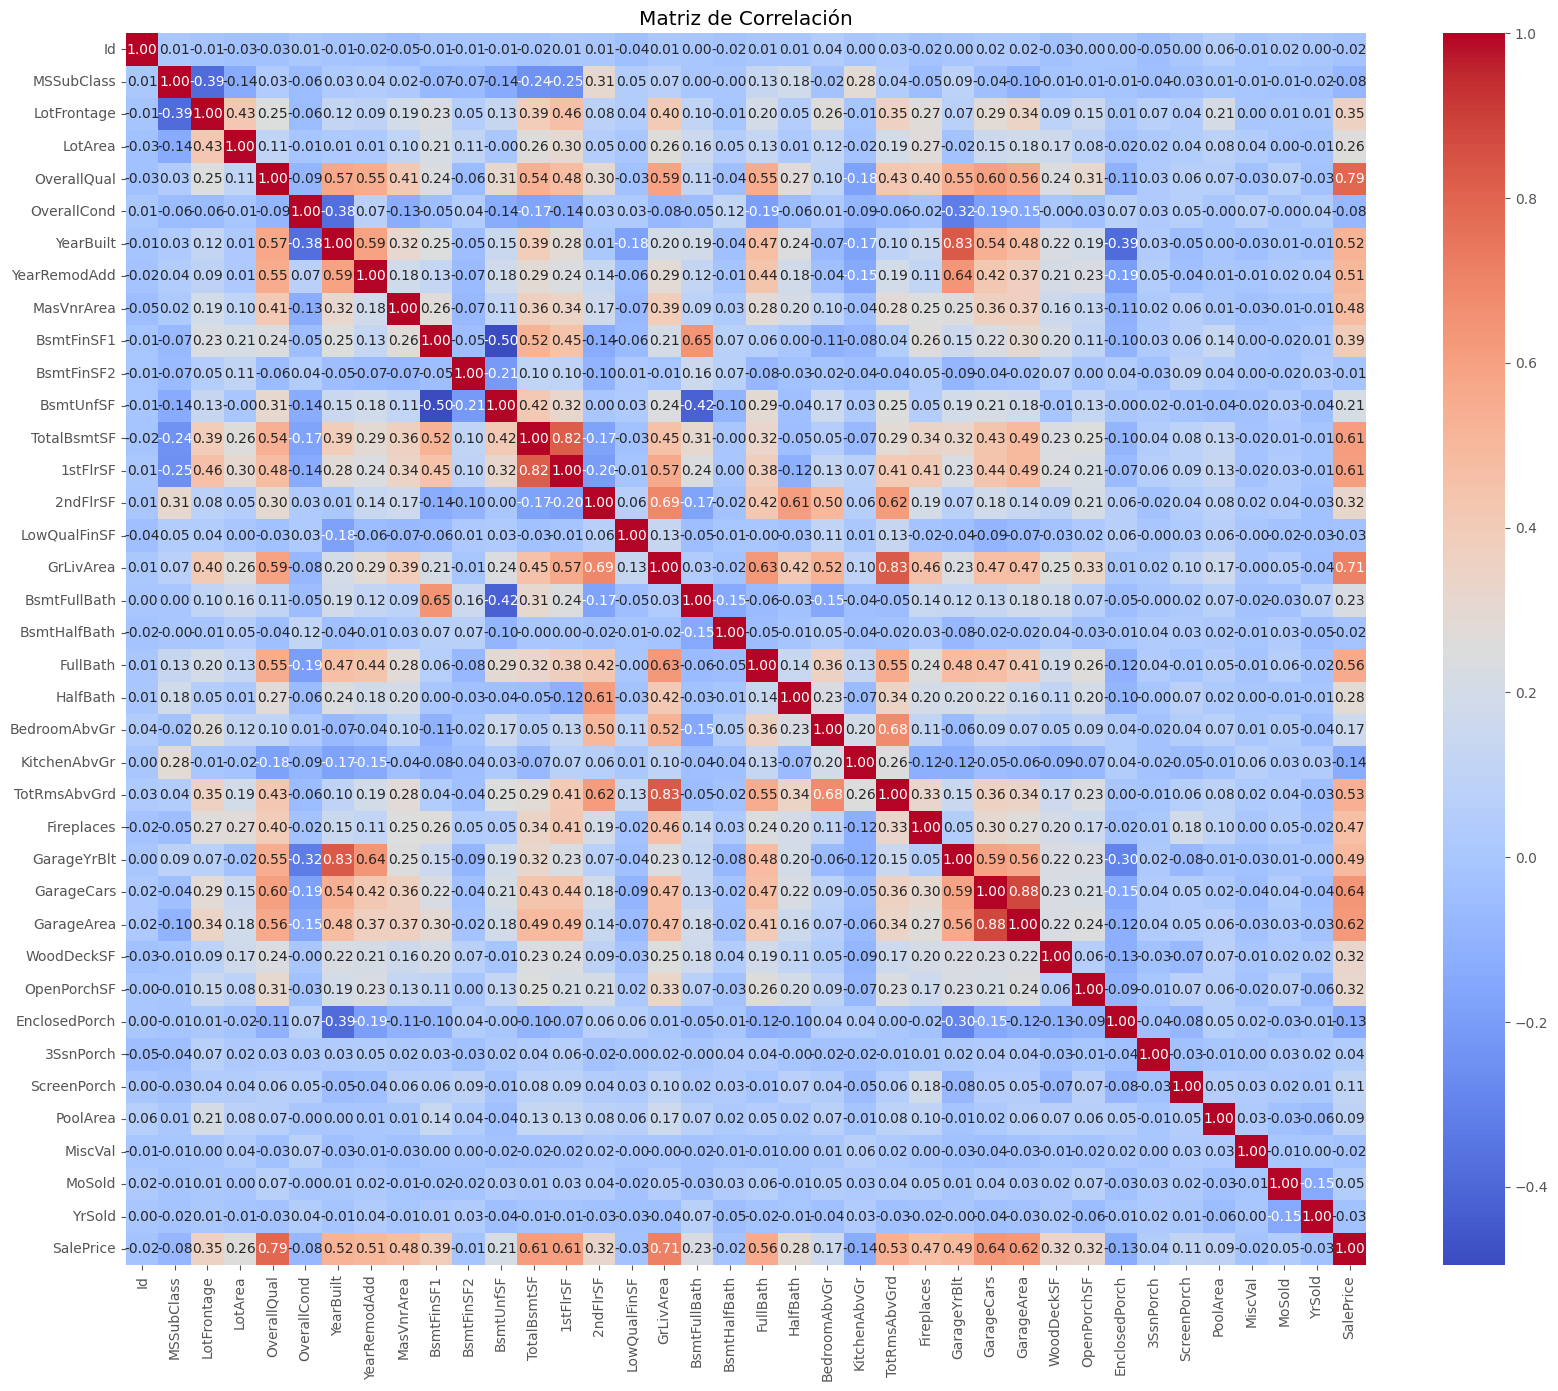

In [5]:
numerical_columns = train_df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numerical_columns.corr()

saleprice_corr = corr_matrix['SalePrice'].sort_values(ascending=False)
print(saleprice_corr)


plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


In [6]:
missing_data = train_df.isnull().sum()
print("Data faltante")
print(missing_data[missing_data > 0])

numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_columns:
  train_df[col].fillna(train_df[col].mean(), inplace = True)


missing_data_after = train_df.isnull().sum()
print("Data faltante luego de llenar con la media")
print(missing_data_after[missing_data_after > 0])

Data faltante
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64
Data faltante luego de llenar con la media
Alley           1369
MasVnrType       872
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


/tmp/ipykernel_38632/1233312618.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_df[col].mean(), inplace = True)


# Variables Dicotomicas

In [7]:
saleprice_q1 = train_df['SalePrice'].quantile(0.25)
saleprice_q3 = train_df['SalePrice'].quantile(0.75)

train_df['Cara'] = (train_df['SalePrice'] > saleprice_q3).astype(int)
train_df['Media'] = ((train_df['SalePrice'] <= saleprice_q3) & (train_df['SalePrice'] > saleprice_q1)).astype(int)
train_df['Barata'] = (train_df['SalePrice'] <= saleprice_q1).astype(int)

print(train_df[['SalePrice','Cara','Media','Barata']].head())


   SalePrice  Cara  Media  Barata
0     208500     0      1       0
1     181500     0      1       0
2     223500     1      0       0
3     140000     0      1       0
4     250000     1      0       0


In [8]:

def calculate_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

# Calcular VIF
X = train_df.drop('Cara', axis=1)
X = train_df.select_dtypes(include=['int64', 'float64'])
vif_data = calculate_vif(X)
print(vif_data)

/home/danidubon12/.local/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


        variables           VIF
0              Id  1.027488e+00
1      MSSubClass  1.716115e+00
2     LotFrontage  1.576499e+00
3         LotArea  1.278568e+00
4     OverallQual  3.792968e+00
5     OverallCond  1.665977e+00
6       YearBuilt  5.326260e+00
7    YearRemodAdd  2.463997e+00
8      MasVnrArea  1.438221e+00
9      BsmtFinSF1           inf
10     BsmtFinSF2           inf
11      BsmtUnfSF           inf
12    TotalBsmtSF           inf
13       1stFlrSF           inf
14       2ndFlrSF           inf
15   LowQualFinSF           inf
16      GrLivArea           inf
17   BsmtFullBath  2.265797e+00
18   BsmtHalfBath  1.163213e+00
19       FullBath  2.976868e+00
20       HalfBath  2.209033e+00
21   BedroomAbvGr  2.417802e+00
22   KitchenAbvGr  1.609043e+00
23   TotRmsAbvGrd  4.948891e+00
24     Fireplaces  1.624975e+00
25    GarageYrBlt  3.394994e+00
26     GarageCars  5.699415e+00
27     GarageArea  5.505315e+00
28     WoodDeckSF  1.229907e+00
29    OpenPorchSF  1.226940e+00
30  Encl

In [9]:
y = train_df.pop("Cara")
x = train_df[['OverallQual', 'GrLivArea', 'TotalBsmtSF']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, train_size = 0.7, random_state = 42)

y.value_counts()

Cara
0    1098
1     362
Name: count, dtype: int64

In [10]:
logReg = LogisticRegression(solver = 'liblinear')
logReg.fit(X_train, y_train)

y_pred = logReg.predict(X_test)

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))

Matriz de confusión:
[[332   4]
 [ 28  74]]

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       336
           1       0.95      0.73      0.82       102

    accuracy                           0.93       438
   macro avg       0.94      0.86      0.89       438
weighted avg       0.93      0.93      0.92       438



La matriz de confusión muestra que el modelo de regresión logística clasifica correctamente 332 instancias de la clase 0 y 74 de la clase 1, con 4 falsos positivos y 28 falsos negativos. Esto se traduce en una precisión del 92% para la clase 0 y del 95% para la clase 1, lo que indica que el modelo es efectivo al predecir la clase positiva. Sin embargo, el recall para la clase 1 es más bajo (73%), lo que sugiere que el modelo tiene dificultades para identificar todas las instancias de esta clase, resultando en un número significativo de falsos negativos. El F1 score para la clase 1 es de 0.82, lo que refleja un buen equilibrio entre precisión y recall.

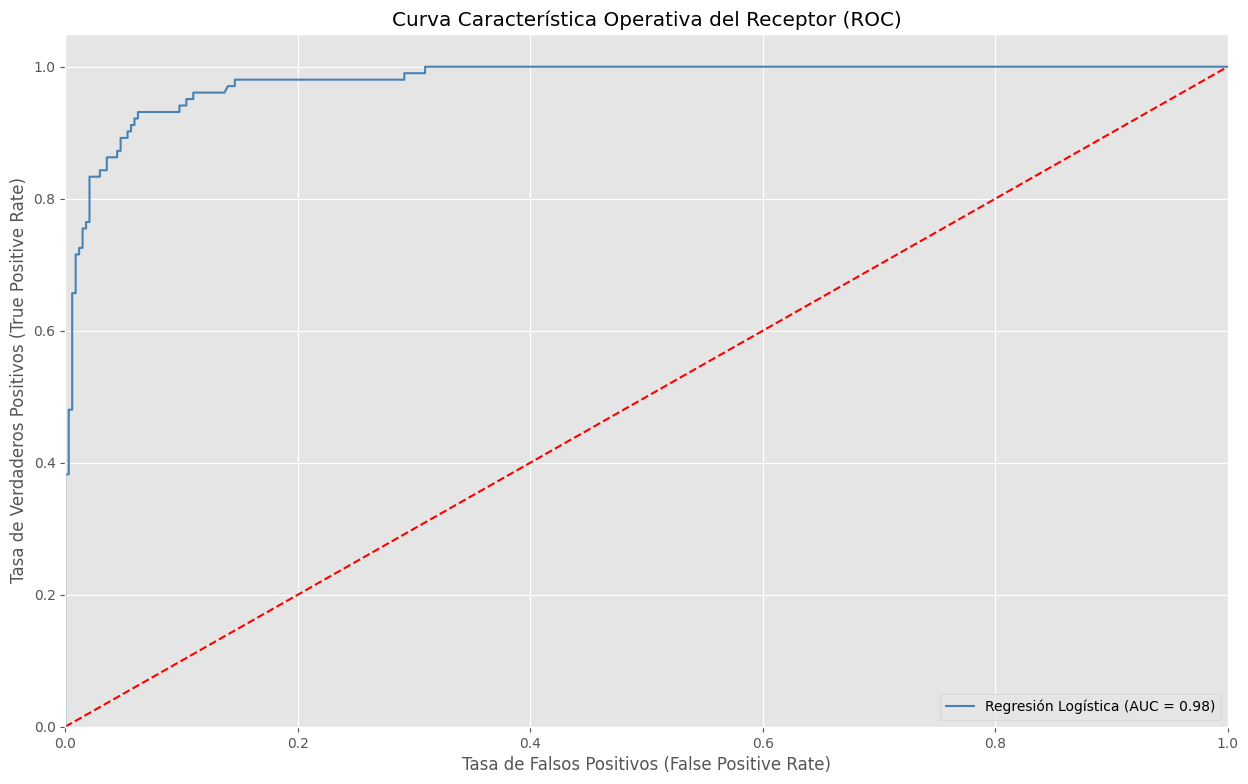

In [11]:
logit_roc_auc = roc_auc_score(y_test, logReg.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, logReg.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr, tpr, label='Regresión Logística (AUC = %0.2f)' % logit_roc_auc, color="steelblue")
plt.plot([0, 1], [0, 1], 'r--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (False Positive Rate)')
plt.ylabel('Tasa de Verdaderos Positivos (True Positive Rate)')
plt.title('Curva Característica Operativa del Receptor (ROC)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC.png')
plt.show()



In [12]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
grid_search = GridSearchCV(estimator=logReg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x, y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

best_model = grid_result.best_estimator_
print(grid_search)

Best: 0.920548 using {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.920320 (0.017007) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.920320 (0.017007) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.917123 (0.018745) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.920320 (0.017007) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.920320 (0.017007) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.916438 (0.018666) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.920548 (0.016740) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.920548 (0.016740) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.911644 (0.017979) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.916895 (0.017925) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.916895 (0.017925) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.848630 (0.024335) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.911872 (0.021856) wit

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       336
           1       0.93      0.80      0.86       102

    accuracy                           0.94       438
   macro avg       0.94      0.89      0.91       438
weighted avg       0.94      0.94      0.94       438



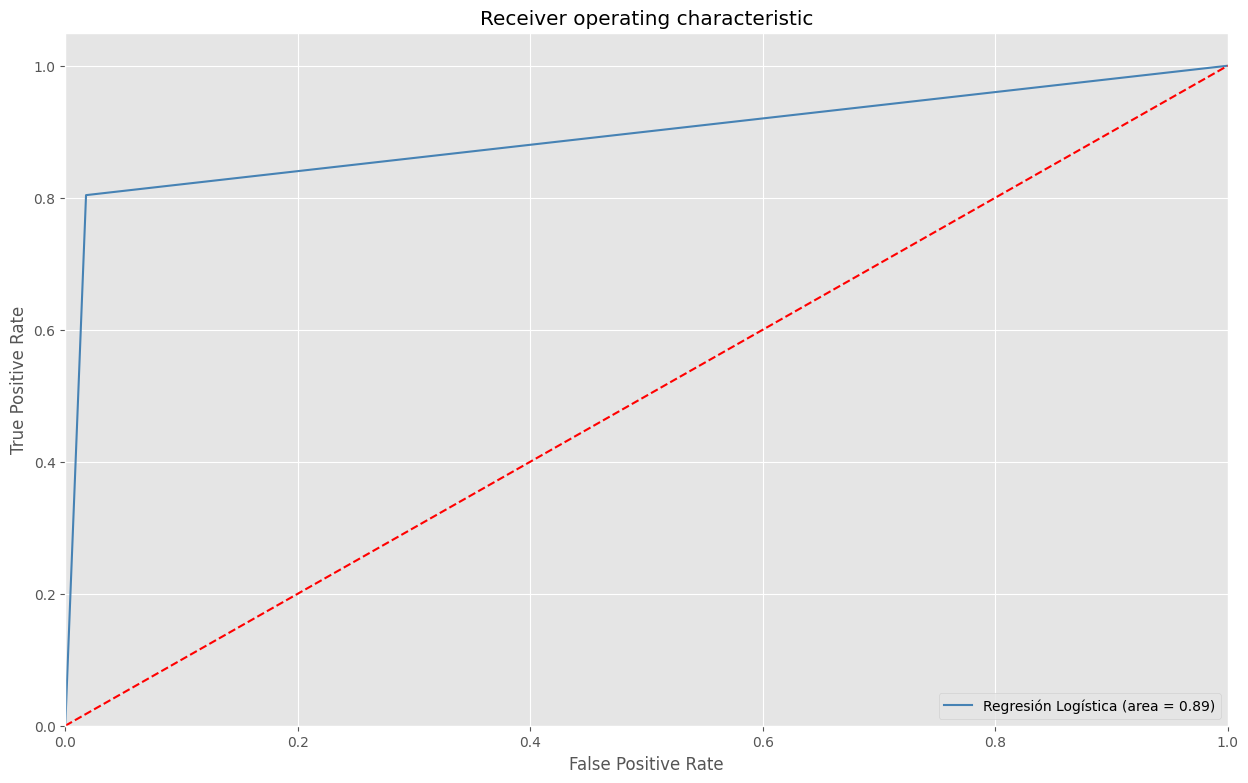

In [13]:
ypred = best_model.predict(X_test)
print(classification_report(y_test,ypred))

logit_roc_auc = roc_auc_score(y_test, ypred)
fpr, tpr, thresholds = roc_curve(y_test, ypred)
plt.figure()
plt.plot(fpr, tpr, label='Regresión Logística (area = %0.2f)' % logit_roc_auc, color="steelblue")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


